<h1 align="center">Crime Data in Los Angeles</h1>

![Image of Graffiti](http://finance.lacity.org/sites/g/files/wph641/f/styles/regular_hero/public/LA_Pano_0.JPG?itok=9DIiiZDv)

The dataset is obtained from <a href="https://data.lacity.org/A-Safe-City/Crime-Data-from-2010-to-Present/y8tr-7khq/data">Data LA city org</a>.

# <font color=Red>1. Preparation</font>

## <font color=Blue>1.1. Importing Modules</font>

In [1]:
import datetime as dt
import gmplot
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
from pylab import rcParams
import seaborn as sns

%matplotlib inline

In [2]:
rcParams["figure.figsize"] = 10,8

# <font color=Red>2. Exploring and Cleaning</font>

## <font color=Blue>2.1. Loading</font>

I will be loading the csv data with Pandas

In [3]:
crime=pd.read_csv("C:\\Users\Kenneth\JuNo\PP01 Crime Data\crime_data.csv")

In [4]:
print("The shape is {}".format(crime.shape))
print("Previewing the first 3 and last 3 rows of the data by concatenating the head and the tail.")
pd.concat([crime.head(3), crime.tail(3)])

The shape is (1657559, 26)
Previewing the first 3 and last 3 rows of the data by concatenating the head and the tail.


,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
1657556,172121879,12/29/2017,12/29/2017,2017,21,Topanga,2142,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0325,...,NaN,IC,Invest Cont,442.0,NaN,NaN,NaN,6500 PLATT AV,NaN,"(34.1882, -118.6427)"
1657557,172121881,12/30/2017,12/22/2017,1200,21,Topanga,2105,354,THEFT OF IDENTITY,0931 1822,...,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,21500 ROSCOE BL,NaN,"(34.2239, -118.6017)"
1657558,172121882,12/30/2017,12/28/2017,1300,21,Topanga,2169,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),0344,...,NaN,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 OAKDALE AV,NaN,"(34.1794, -118.5657)"


Checking for missing data.

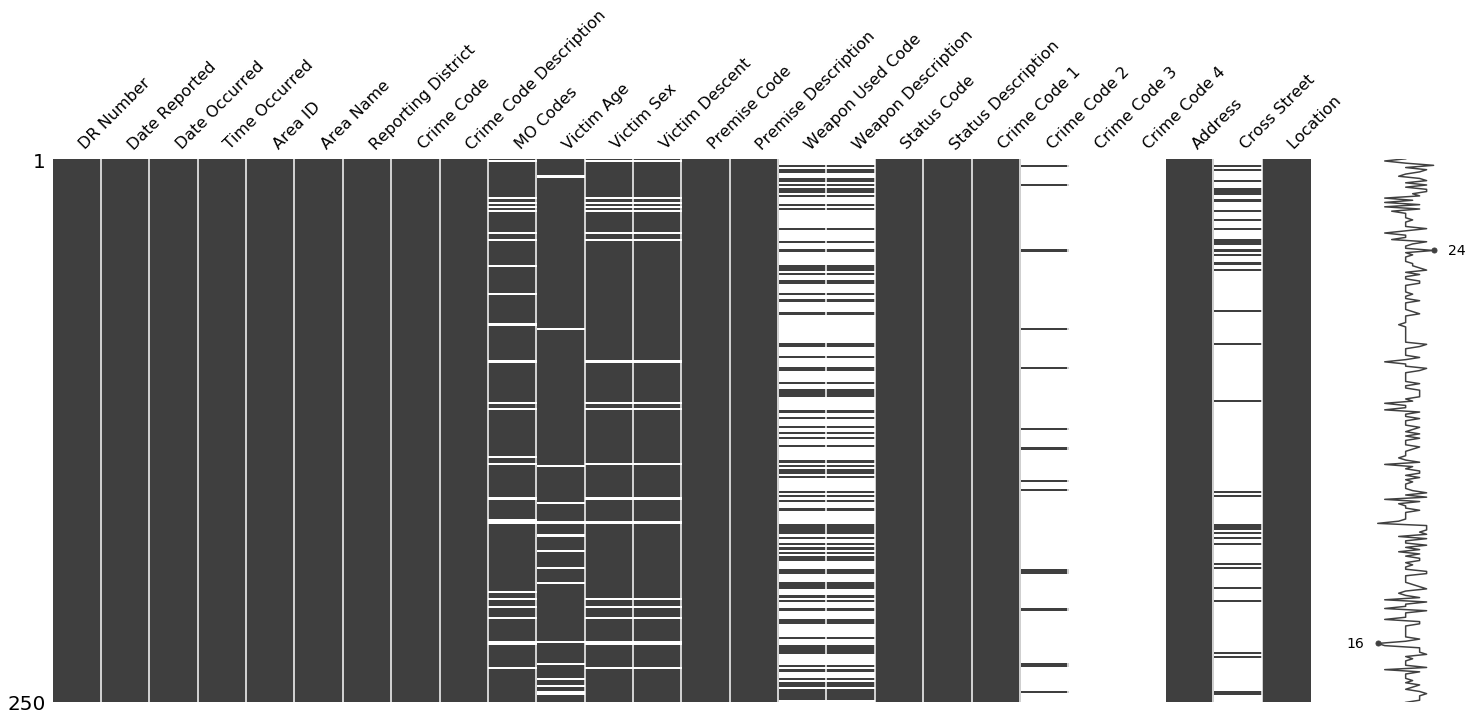

In [5]:
 msno.matrix(crime.sample(250))

## <font color=Blue>2.2. Cleaning</font>

In [6]:
# Changing date columns from string to datetime object
crime["Date Reported"]=pd.to_datetime(crime["Date Reported"], format="%m/%d/%Y")
crime["Date Occurred"]=pd.to_datetime(crime["Date Occurred"], format="%m/%d/%Y")

In [7]:
# Using list comprehension to make new columns for Reported
crime["Day Reported"]=[item.isoweekday() for item in crime["Date Reported"]]
crime["Month Reported"]=[item.month for item in crime["Date Reported"]]
crime["Year Reported"]=[item.year for item in crime["Date Reported"]]

In [8]:
# Using list comprehension to make new columns for Occurred
crime["Day Occurred"]=[item.isoweekday() for item in crime["Date Occurred"]]
crime["Month Occurred"]=[item.month for item in crime["Date Occurred"]]
crime["Year Occurred"]=[item.year for item in crime["Date Occurred"]]

In [9]:
def makemil(time):
    ntime = ""
    if len(str(time)) == 1:
        ntime = "000" + str(time)
    if len(str(time)) == 2:
        ntime = "00" + str(time)
    if len(str(time)) == 3:
        ntime = "0" + str(time)
    if len(str(time)) == 4:
        ntime = str(time)
    return ntime

def returnhour(miltime):
    return miltime[:2]

def returnmin(miltime):
    return miltime[2:]

In [10]:
# Formatting to 4 char string
crime["Time Occurred"]=crime["Time Occurred"].apply(makemil)
crime["Time Occurred Int"]=crime["Time Occurred"].apply(int)
crime["Hour Occurred"]=crime["Time Occurred"].apply(returnhour)
crime["Min Occurred"]=crime["Time Occurred"].apply(returnmin)

In [11]:
nareaid=len(crime["Area ID"].unique())
nrepdist=len(crime["Reporting District"].unique())
ncrimecode=len(crime["Crime Code"].unique())
print("There are {} Area IDs, {} Reporting Districts, and {} Crime Codes.".format(nareaid,nrepdist,ncrimecode))

There are 21 Area IDs, 1283 Reporting Districts, and 139 Crime Codes.


# <font color=Red>3. Previewing the Data Variables</font>

## <font color=Blue>3.1. Day Reported and Occurred</font>

Throughout the notebook, you will see me taking up memory by creating dataframes to improve readability.

In [13]:
df1=crime["Day Reported"].value_counts().sort_index().to_frame()
df2=crime["Day Occurred"].value_counts().sort_index().to_frame()

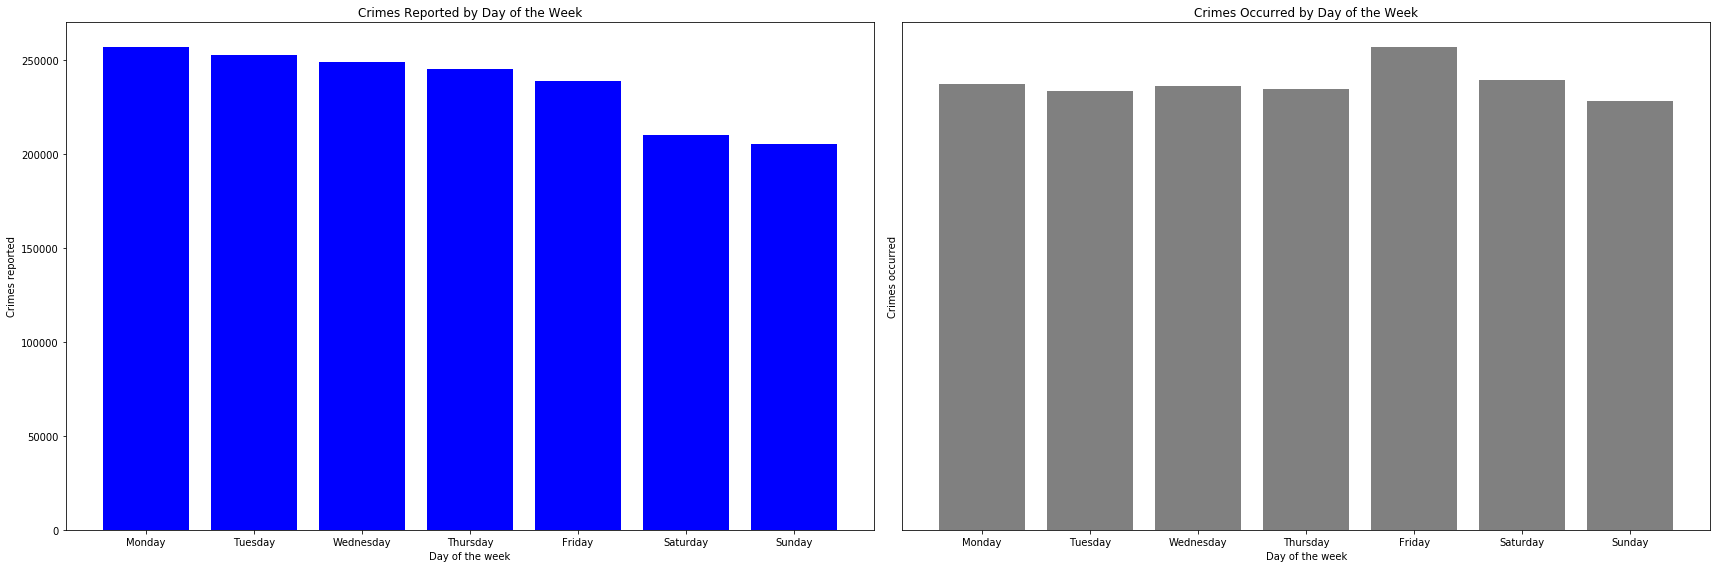

In [14]:
fig,ax=plt.subplots(1,2, figsize=(24,8))

# First axes
ax[0].bar(df1.index, df1["Day Reported"], align="center", color="Blue")
ax[0].set_title("Crimes Reported by Day of the Week")
ax[0].set_xlabel("Day of the week")
ax[0].set_ylabel("Crimes reported")
ax[0].set_xticklabels(["", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# First axes
ax[1].bar(df2.index, df2["Day Occurred"], align="center", color="Gray")
ax[1].set_title("Crimes Occurred by Day of the Week")
ax[1].set_xlabel("Day of the week")
ax[1].set_ylabel("Crimes occurred")
ax[1].set_yticks([],[])
ax[1].set_xticklabels(["", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

fig.tight_layout()

From the above bar plots, some conclusions are:
* The station doesn't require as much officers handling crime reports in the police station.
* The officers working in the station on the weekend can be reallocated to patrol on Fridays.

## <font color=Blue>3.2. Month Reported and Occurred</font>

In [15]:
df3=crime["Month Reported"].value_counts().sort_index().to_frame()
df4=crime["Month Occurred"].value_counts().sort_index().to_frame()
df5=pd.merge(df3, df4, left_index=True, right_index=True)

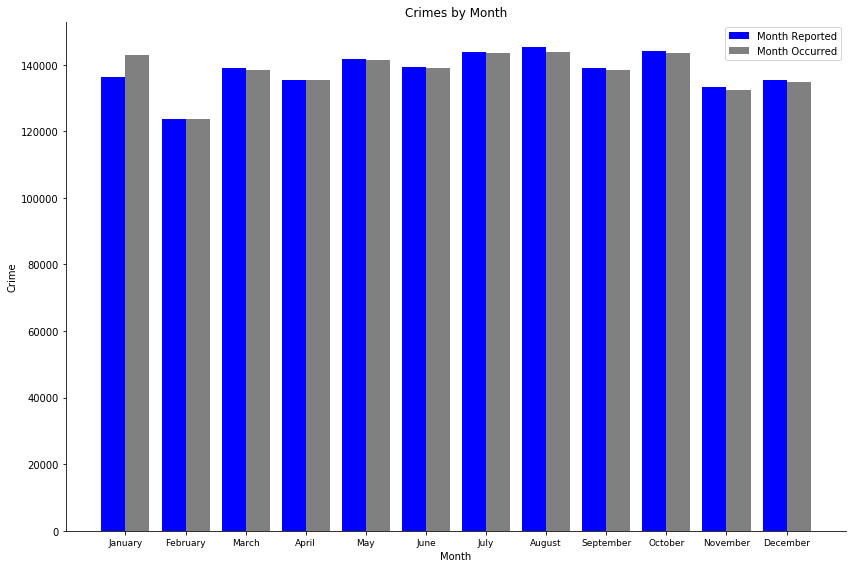

In [16]:
fig,ax=plt.subplots(figsize=(12,8))

# PLotting
bar_width=0.4
bar1=ax.bar(df5.index, df5["Month Reported"], width=bar_width*-1, align="edge", color="Blue")
bar2=ax.bar(df5.index, df5["Month Occurred"], width=bar_width, align="edge", color="Gray")
ax.set_title("Crimes by Month")
ax.set_xlabel("Month")
ax.set_ylabel("Crime")
ax.set_xticks(range(1,13))
ax.set_xticklabels(["January", "February", "March", "April", "May", "June",
                    "July", "August", "September", "October", "November", "December"], fontsize=9)
ax.legend((bar1,bar2),("Month Reported","Month Occurred"))

fig.tight_layout()
sns.despine()

## <font color=Blue>3.3. Year Reported and Occurred</font>

In [17]:
df6=crime["Year Reported"].value_counts().sort_index().to_frame()
df7=crime["Year Occurred"].value_counts().sort_index().to_frame()
df8=pd.merge(df6, df7, left_index=True, right_index=True)

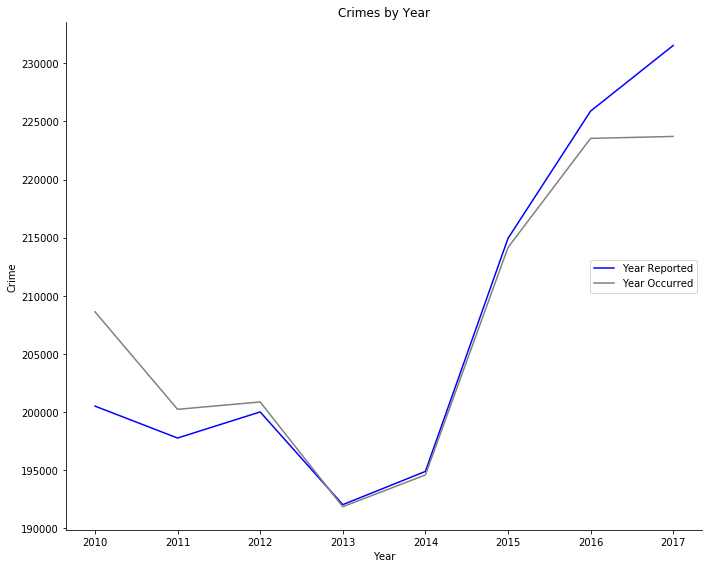

In [18]:
fig,ax=plt.subplots()

# Plotting
ax.set_prop_cycle("color",["Blue","Gray"])
ax.plot(df8)
ax.set_title("Crimes by Year")
ax.set_xlabel("Year")
ax.set_ylabel("Crime")
ax.legend(df8, loc=7)

fig.tight_layout()
sns.despine()

It is fascinating to note that there are more crimes occurring in 2010 but more crimes reported in 2017. One of my hypothesis is:
<p><u>Time lag</u> between incidence and reporting. Take an example of an identity theft crime (foreshadowing to the most interesting crime). You could have your identity stolen in 2010 but you only figured it out by 2017. This would inflate 2010's occurrence and later year's reporting.</p>

In [19]:
dfcum1=pd.DataFrame()
for i in range(2010,2018):
    dfcum1[i]=crime[crime["Year Occurred"]==i]["Year Reported"].value_counts().sort_index().to_frame()["Year Reported"]
dfcum1.fillna("")

,2010,2011,2012,2013,2014,2015,2016,2017
2010,200510,,,,,,,
2011,5446,192318,,,,,,
2012,1018,5483,193509,,,,,
2013,566,993,5397,185078,,,,
2014,392,592,966,5143,187799,,,
2015,295,338,439,865,5472,207526,,
2016,233,307,300,465,863,5729,217987,
2017,160,203,256,304,455,896,5550,223706


Along horizontally, these are the year of crime occurred. And thus, vertically are the year of crimes reported. On the bottom left, the number 160 represents the number of crimes occurring in 2010 but is reported in 2017. In short,
<p>160 crimes, <u>occurred in 2010</u>, <u>reported in 2017</u>.</p>

In [20]:
print("At most, it seems that the total number of 'lagged crimes' is up to {}.".format(int(dfcum1.loc[2017][:-1].sum())))

At most, it seems that the total number of 'lagged crimes' is up to 7824.


The number of lagged crimes explains the discrepancy between the number of crimes reported and crimes occurring.

## <font color=Blue>3.4. Date Reported and Occurred</font>

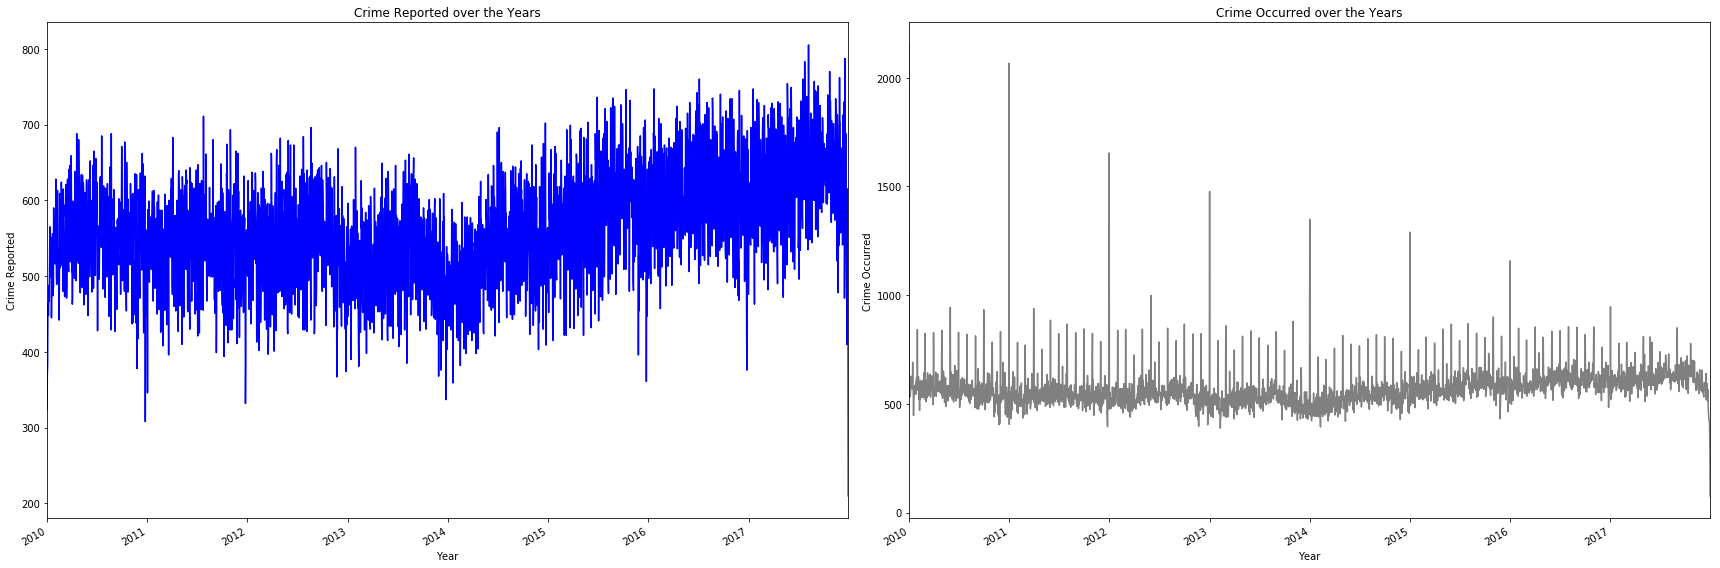

In [21]:
fig,ax=plt.subplots(1,2, figsize=(24,8))

# First axes

# Plotting
crime["Date Reported"].value_counts().to_frame().plot(ax=ax[0], color="Blue")
ax[0].set_title("Crime Reported over the Years")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Crime Reported")
ax[0].legend_.remove()

# First axes
crime["Date Occurred"].value_counts().to_frame().plot(ax=ax[1], color="Gray")
ax[1].set_title("Crime Occurred over the Years")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Crime Occurred")
ax[1].legend_.remove()

fig.tight_layout()

There are these spikes within crime occurrance dates (major spike at beginning of the year, minor spikes beginning of the month) which I atttribute to unknown date of the crime. It seems that if 
someone only realizes that they are a victim of identity theft, the paperwork for 'crime occurrence' are assumed to be a 
specific date.

In short, all crimes with unknown occurring date are all attributed to a specific date.

## <font color=Blue>3.5. Time Occurred</font>

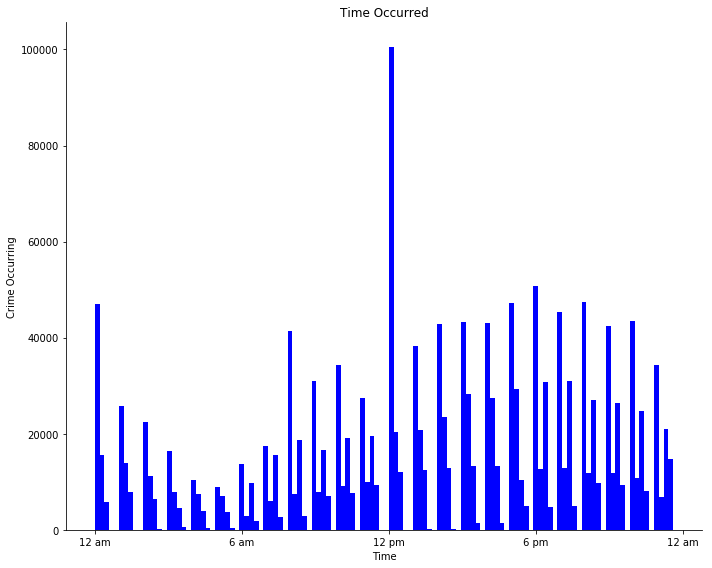

In [22]:
fig,ax=plt.subplots()

# Plotting
ax.hist(crime["Time Occurred Int"], bins=120, color="Blue")
ax.set_title("Time Occurred")
ax.set_xlabel("Time")
ax.set_ylabel("Crime Occurring")
plt.xticks([0,600,1200,1800,2400],["12 am", "6 am", "12 pm", "6 pm", "12 am"])

fig.tight_layout()
sns.despine()

Again, there are these major spikes at the beginning of every hour, which I would assume to be when a crime is reported to occur "around 8 am". The unknown minute is filed as occurring at the beginning of the hour.

## <font color=Blue>3.6. Spikes in Time Occurred</font>

## At 12 o'clock

In [23]:
hour12=crime[crime["Hour Occurred"]=="12"]

# Subsetting top 6 crimes
top6crimes1=hour12["Crime Code Description"].value_counts().head(6).index
hour12=hour12.loc[hour12["Crime Code Description"].isin(top6crimes1)]

# Subsetting top 6 premises
top6premises1=hour12["Premise Description"].value_counts().head(6).index
hour12=hour12.loc[hour12["Premise Description"].isin(top6premises1)]

print("The shape is {}".format(hour12.shape))

The shape is (58286, 35)


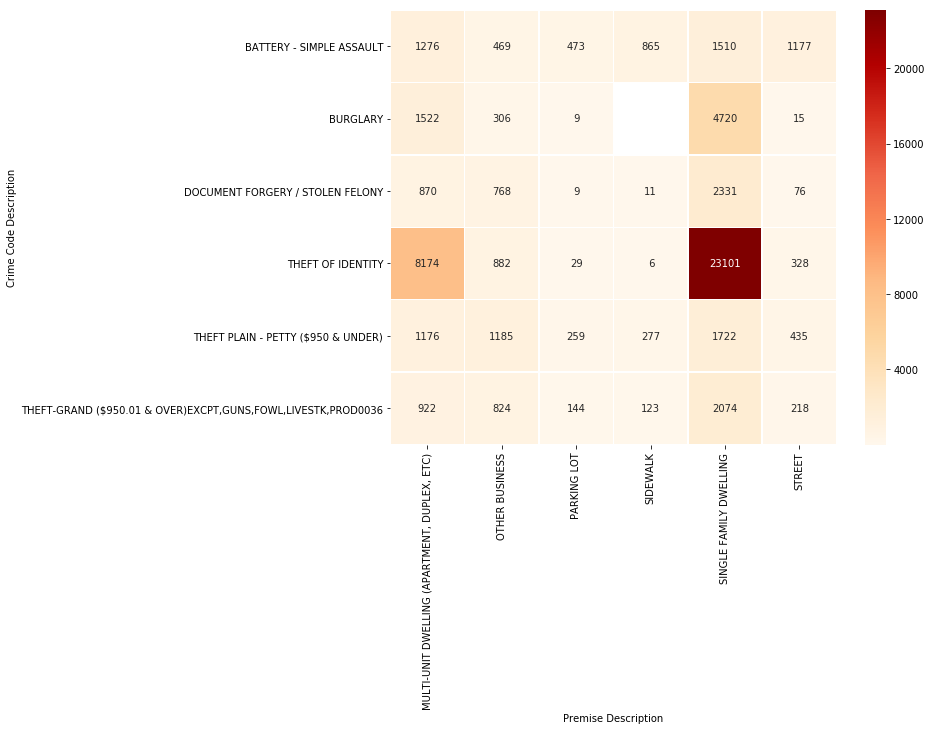

In [24]:
# Grouping by Crime Code and Premise
df9=hour12.groupby(["Crime Code Description", "Premise Description"]).size().reset_index(name="Count")

# Prepping data for heatmap
ccpremise1=df9.pivot("Crime Code Description", "Premise Description", "Count")

# Draw a heatmap with the numeric values in each cell
fig,ax=plt.subplots()
sns.heatmap(ccpremise1, annot=True, linewidths=.5, ax=ax, fmt="2g", cmap="OrRd")

plt.subplots_adjust() 

Excluding identity theft, our second cause of noon crimes occur in single family dwelling. I shall go over through the top 5:
* Burglary in single family dwelling. This makes sense because owners aren't home which makes an easy target for burglars.
* Document forgery in single family dwelling. As with identity theft, it is hard to pinpoint when exactly a document is forged, thus attributed to 12pm.
* Grand theft and Petty theft in single family dwellings follows the same logic that there will be no owners at home.
* Burglary in multi-unit dwellings also makes sense because most of the inhabitants are out at work for the day.

As expected, identitfy theft is the driving crime since it is hard to figure out when the crime occurred.

## In the first 15 minutes of the hour

In [25]:
min15=crime[crime["Min Occurred"].isin(["0"+str(i) if i<10 else str(i) for i in range(0,16)])]

# Subsetting top 6 crimes
top6crimes2=min15["Crime Code Description"].value_counts().head(6).index
min15=min15.loc[min15["Crime Code Description"].isin(top6crimes2)]

# Subsetting top 6 premises
top6premises2=min15["Premise Description"].value_counts().head(6).index
min15=min15.loc[min15["Premise Description"].isin(top6premises2)]

print("The shape is {}".format(min15.shape))

The shape is (366780, 35)


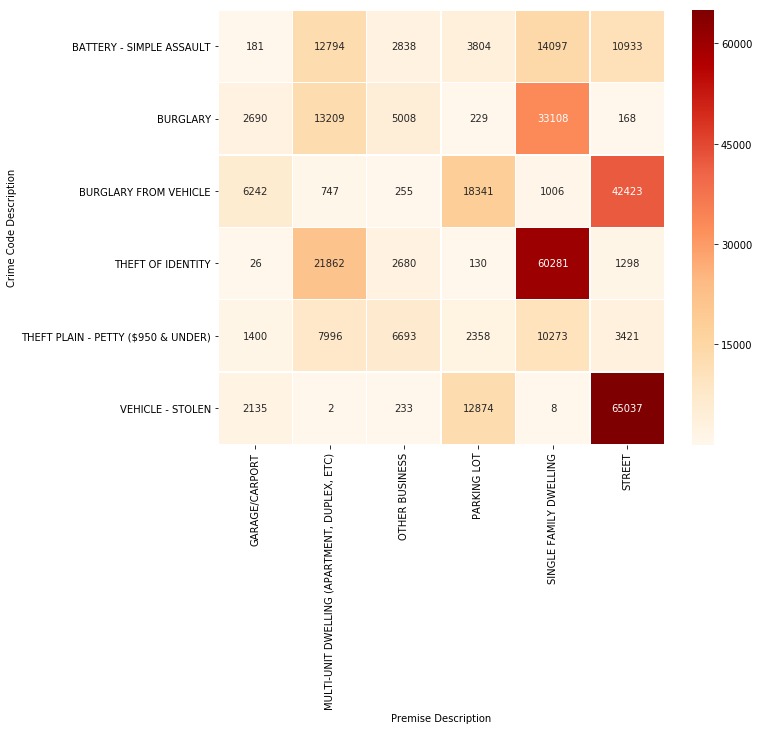

In [26]:
# Grouping by Crime Code and Premise
df10=min15.groupby(["Crime Code Description", "Premise Description"]).size().reset_index(name="Count")

# Prepping data for heatmap
ccpremise2=df10.pivot("Crime Code Description", "Premise Description", "Count")

# Draw a heatmap with the numeric values in each cell
fig,ax=plt.subplots()
sns.heatmap(ccpremise2, annot=True, linewidths=.5, ax=ax, fmt="2g", cmap="OrRd")

plt.subplots_adjust() 

Crimes with unknown time of incidence, such as Burglary, Identity theft, and Stolen vehicle are all attributed to the first 15 minutes of the hour.

## Excluding Identity Theft

In [27]:
df11=crime[crime["Crime Code Description"] != "THEFT OF IDENTITY"]
df12=df11["Hour Occurred"].value_counts().sort_index().to_frame()
df13=crime["Hour Occurred"].value_counts().sort_index().to_frame()

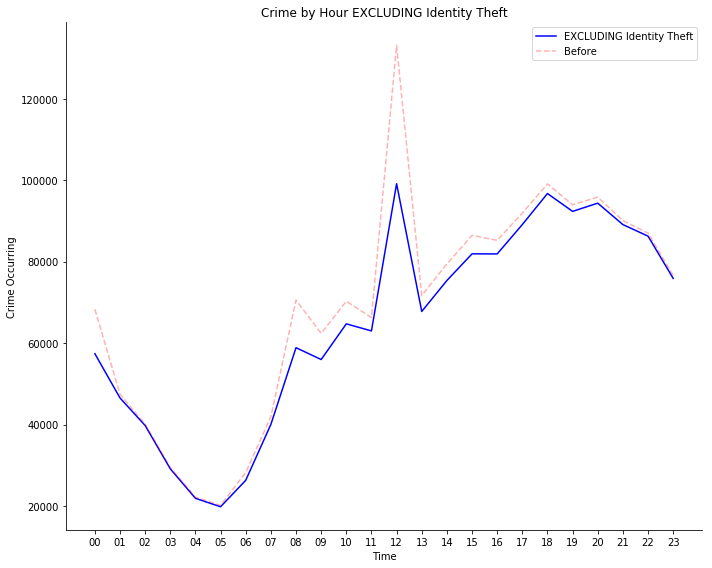

In [28]:
fig,ax=plt.subplots()

# Plotting
ax.plot(df12, color="Blue", label="EXCLUDING Identity Theft")
ax.plot(df13, color="Red", linestyle='--', alpha=.3, label="Before")
ax.set_title("Crime by Hour EXCLUDING Identity Theft")
ax.set_xlabel("Time")
ax.set_ylabel("Crime Occurring")
ax.legend()

fig.tight_layout()
sns.despine()

## <font color=Blue>3.7. Area</font>

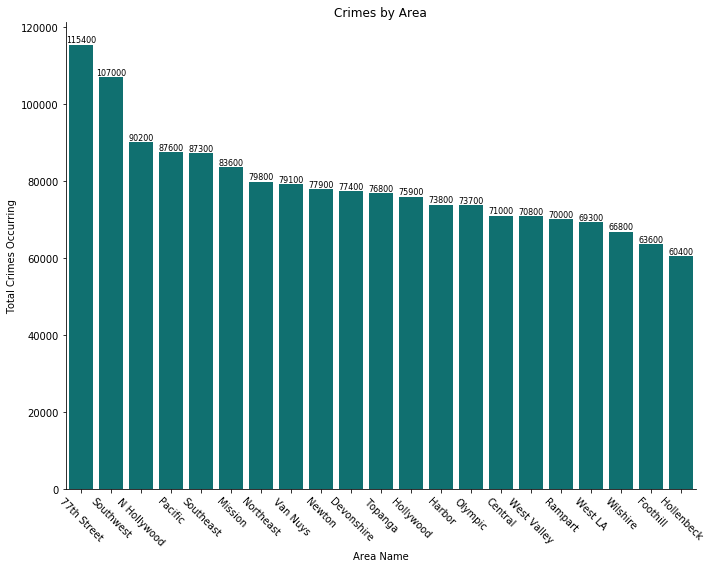

In [31]:
fig,ax=plt.subplots()

# Plotting
df14=crime["Area Name"].value_counts().to_frame()
sns.barplot(df14.index, df14["Area Name"], color="Teal", ax=ax)
ax.set_title("Crimes by Area")
ax.set_xlabel("Area Name")
ax.set_ylabel("Total Crimes Occurring")
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=8, color='black', ha='center', va='bottom')

fig.tight_layout()
sns.despine()

There are twice as much crimes in the 77th Street Area than Hollenbeck, which is interesting because of the population 
and square miles ratio.

* 77th Street: Approximately 175,000 population and 11.9 square miles.
* Hollenbeck: Apprioximately 200,000 population and 15.2 square miles.

## <font color=Blue>3.8. Crime Code</font>

In [32]:
df15=crime["Crime Code Description"].value_counts().to_frame().iloc[:20]

In [33]:
print("Since there are {} types of crime we are only plotting top 20.".format(len(crime["Crime Code Description"].unique())))

Since there are 143 types of crime we are only plotting top 20.


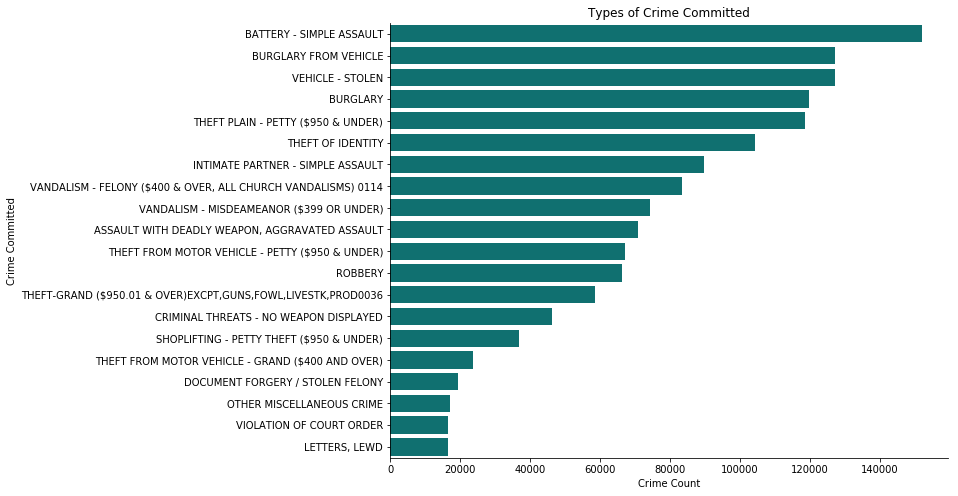

In [34]:
fig,ax=plt.subplots()

# Plotting
sns.barplot(df15["Crime Code Description"], df15.index, color="Teal", ax=ax)
ax.set_title("Types of Crime Committed")
ax.set_xlabel("Crime Count")
ax.set_ylabel("Crime Committed")

sns.despine()

Battery leads the crime chart with a difference of at least 10% from the next crimes, Burglary from Vehicle & Stolen Vehicle.

## <font color=Blue>3.9. MO Code</font>

MO, or Modus Operandi, is defined by Wikipedia as someone's habits of working. Particularly, the actions involved in a crime.

In [35]:
# Splitting the MO codes per whitespace
MO_list = []
for item in crime["MO Codes"].dropna():
    for each in str(item).split():
        MO_list.append("MO"+each)

In [36]:
df16=pd.Series(MO_list).value_counts()[:20].to_frame()

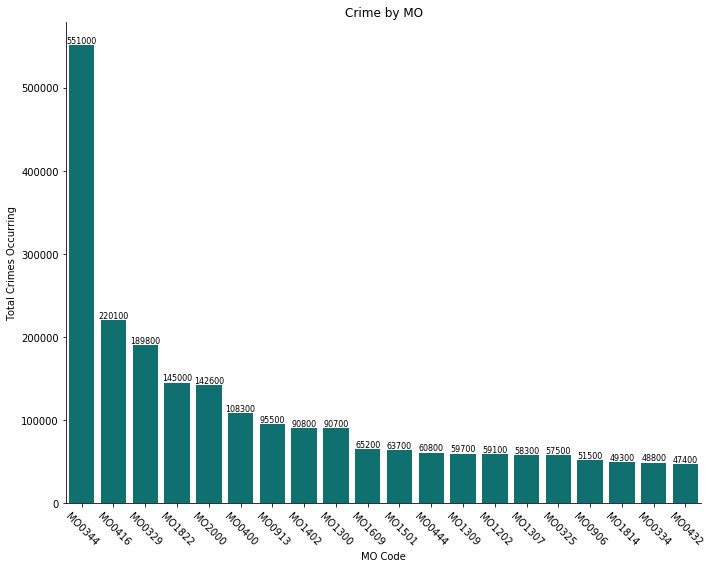

In [37]:
fig,ax=plt.subplots()

# Plotting
sns.barplot(df16.index, df16[0], color="Teal", ax=ax)
ax.set_title("Crime by MO")
ax.set_xlabel("MO Code")
ax.set_ylabel("Total Crimes Occurring")
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=8, color='black', ha='center', va='bottom')
    
fig.tight_layout()
sns.despine()

[MO Codes Description](https://drive.google.com/file/d/0B_pE2uXYbVrDTFRONThLR2MtZlE/view?usp=sharing)

* MO 0344: Removes vict property
* MO 0416: Hit-hit w/ weapon
* MO 0329: Vandalized
* MO 1822: Stranger
* MO 2000: Domestic violence


## <font color=Blue>3.10. Victim Age</font>

In [38]:
# Basic stats about Victim Age
crime["Victim Age"].describe()[1:]

mean    35.955647
std     16.813819
min     10.000000
25%     23.000000
50%     34.000000
75%     48.000000
max     99.000000
Name: Victim Age, dtype: float64

Mean of the victims are 35, and is supported by a median of 34.

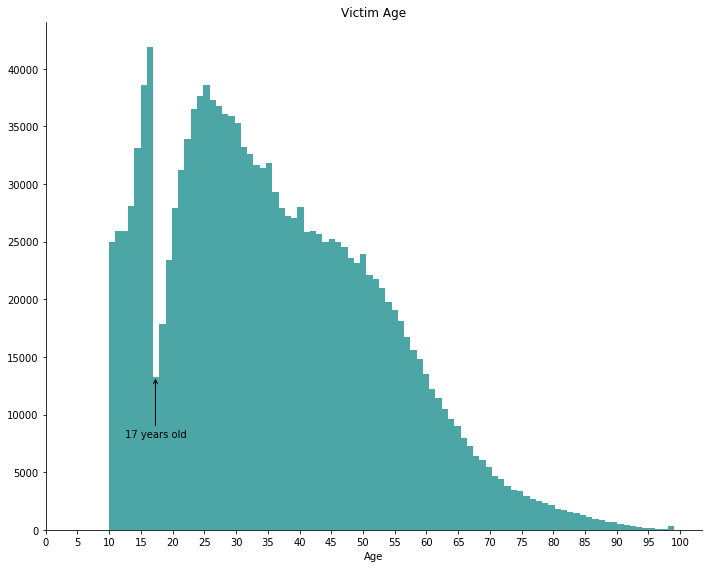

In [139]:
fig,ax=plt.subplots()

# Plotting
ax.hist(crime["Victim Age"].dropna(), bins=90, color="Teal", alpha=.7)
ax.set_title("Victim Age")
ax.set_xlabel("Age")
ax.set_xticks(np.arange(0,101,5))
ax.annotate("17 years old", xy=(17.3, 13289), xycoords="data", xytext=(17.3, 8000), textcoords="data", ha="center", arrowprops=dict(arrowstyle="->"))

fig.tight_layout()
sns.despine()

## <font color=Blue>3.11. Victim Sex</font>

In [40]:
# Victim Sex Demographics
crime["Victim Sex"].value_counts()                                

M    772625
F    705155
X     27224
H        56
-         1
Name: Victim Sex, dtype: int64

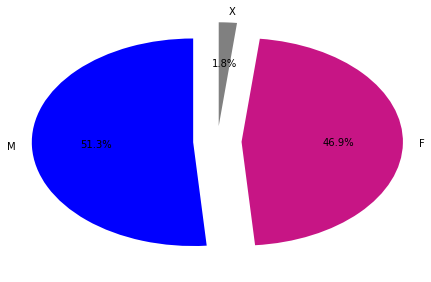

In [41]:
fig,ax=plt.subplots(figsize=(6,4))

# Plotting
ax.pie(crime["Victim Sex"].value_counts()[:3],labels=crime["Victim Sex"].value_counts()[:3].index, startangle=90, 
       explode=(0.15,0.15,.15), autopct="%0.1f%%", colors=("blue","mediumvioletred","gray"))
fig.tight_layout()

## <font color=Blue>3.12. Victim Descent</font>

In [42]:
# Changing the abbreviations to the whole description
Victims_bg = {
    "A": "Other Asian",
    "B": "Black",
    "C": "Chinese",
    "D": "Cambodian",
    "F": "Filipino",
    "G": "Guamanian",
    "H": "Hispanic/Latin/Mexican",
    "I": "American Indian/Alaskan Native",
    "J": "Japanese",
    "K": "Korean",
    "L": "Laotian",
    "O": "Other",
    "P": "Pacific Islander",
    "S": "Samoan",
    "U": "Hawaiian",
    "V": "Vietnamese",
    "W": "White",
    "X": "Unknown",
    "Z": "Asian Indian"
}
crime["Victim Descent"] = crime["Victim Descent"].map(Victims_bg)
df17=crime["Victim Descent"].value_counts().to_frame()

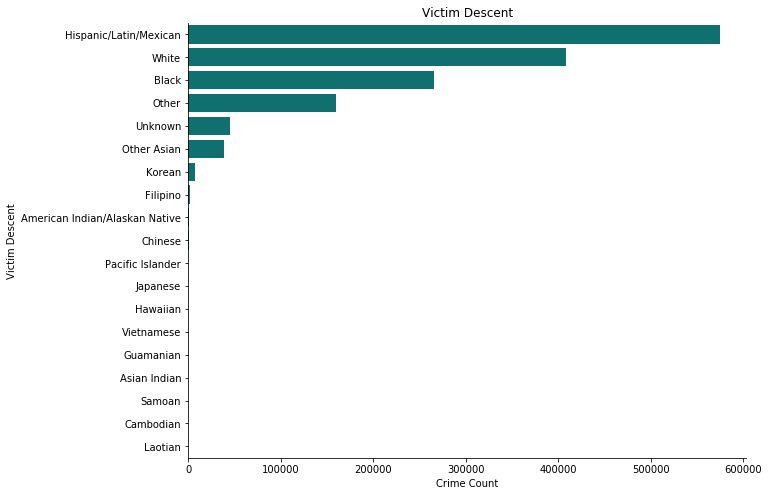

In [43]:
fig,ax=plt.subplots()

# Plotting
sns.barplot(y=df17.index, x=df17["Victim Descent"], color="Teal", ax=ax)
ax.set_title("Victim Descent")
ax.set_xlabel("Crime Count")
ax.set_ylabel("Victim Descent")

sns.despine()

There are 7000 Korean crime victims and only 2000 Filipino crime victims in the last 5 years.

## <font color=Blue>3.13. Victim Sex</font>

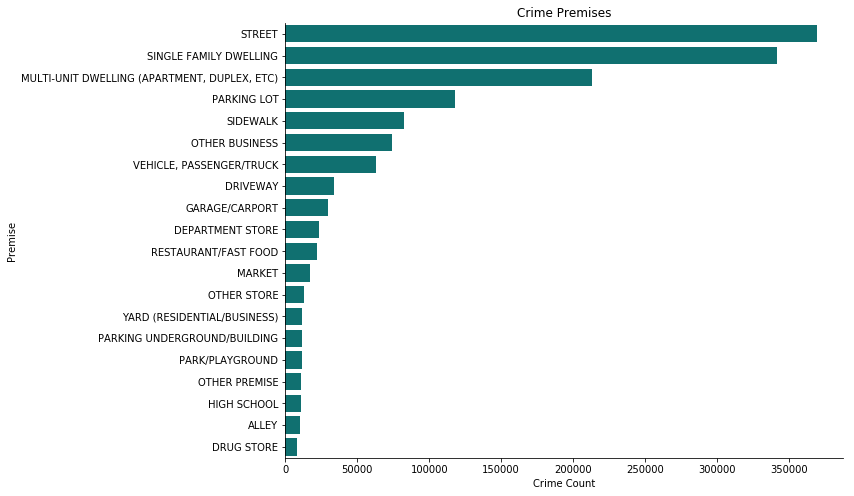

In [44]:
fig,ax=plt.subplots()

# Plotting
df18=crime["Premise Description"].value_counts()[:20].to_frame()
sns.barplot(y=df18.index, x=df18["Premise Description"], color="Teal", ax=ax)
ax.set_title("Crime Premises")
ax.set_xlabel("Crime Count")
ax.set_ylabel("Premise")

sns.despine()

We shall look further into the types of crime that happen at the top premises.

## <font color=Blue>3.14. Weapon Description</font>

In [45]:
# Number of Na values
missvals = crime["Weapon Description"].isnull().sum()
print("There are {} missing values".format(missvals))

There are 1108733 missing values


We assume that missing values are either truly missing, or no weapon was used.

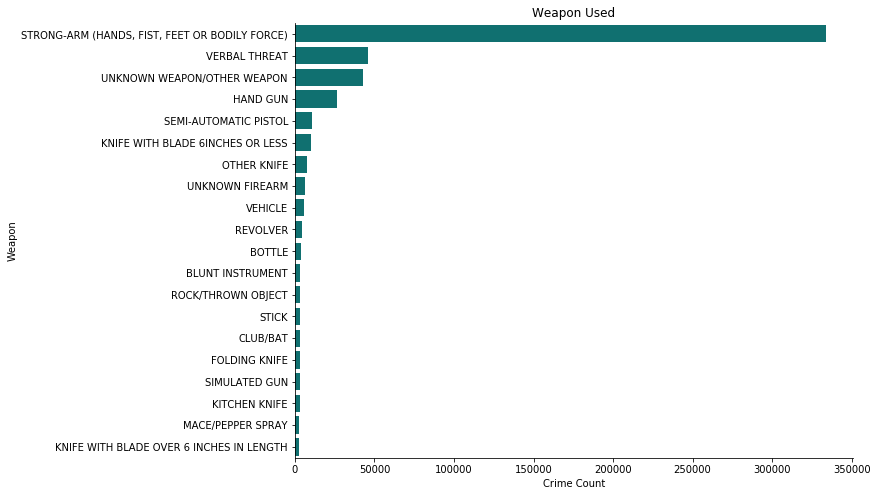

In [46]:
fig, ax = plt.subplots()

# Plotting
df19=crime["Weapon Description"].value_counts()[:20].to_frame()
sns.barplot(y=df19.index, x=df19["Weapon Description"], color="Teal", ax=ax)
ax.set_title("Weapon Used")
ax.set_xlabel("Crime Count")
ax.set_ylabel("Weapon")

sns.despine()

## <font color=Blue>3.15. Status Description</font>


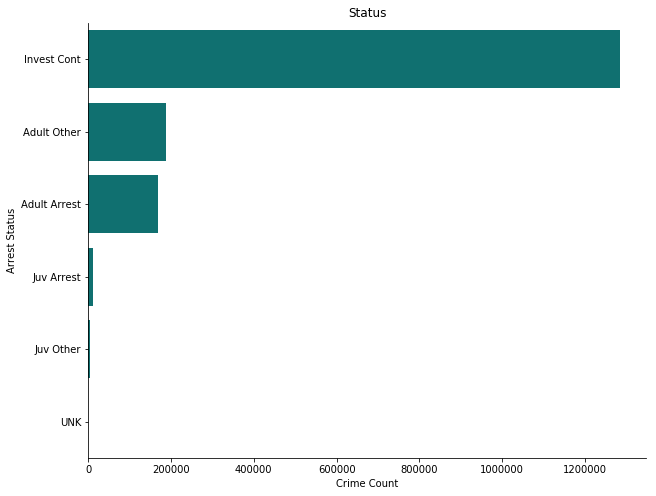

In [47]:
fig,ax=plt.subplots()

# Plotting
df20=crime["Status Description"].value_counts().to_frame()
sns.barplot(y=df20.index, x=df20["Status Description"], color="Teal", ax=ax)
ax.set_title("Status")
ax.set_xlabel("Crime Count")
ax.set_ylabel("Arrest Status")

sns.despine()

It is surprising that there are 6 times more ongoing investigations than adult arrests.

Crime Codes are not provided.

## <font color=Blue>3.16. Coordinates</font>

In [48]:
# Dropping missing values and an out of place coordinate of (0, 0) and creating coordinates
crime_lats = []
crime_lons = []
for locs in crime["Location "].dropna():
    if locs.split(",")[0] != "(0" and locs.split(",")[1] != " 0)":
        crime_lats.append(locs.split(",")[0][1:])
        crime_lons.append(locs.split(",")[1][1:-2])
crime_lats = list(map(float, crime_lats))        
crime_lons = list(map(float, crime_lons))        

In [49]:
# Sets center of the map
gmap = gmplot.GoogleMapPlotter(34.0522, -118.2437, 11)
# Plots the heatmap
gmap.heatmap(crime_lats, crime_lons)

In [50]:
# Saves it
gmap.draw("crime heatmap.html")

I have included a png instead of the html because of the 75MB size of the html rendering too long.
![title](https://i.imgur.com/Lau8xl2.png?1)

# <font color=Red>4. Exploration</font>

## <font color=Blue>4.1. Are certain genders more prone to become victims for certain crimes?</font>

In [51]:
# Removing Entries for X and H and - (by elimination)
crime["Victim Gender"]=crime["Victim Sex"][(crime["Victim Sex"] != "X")&
                                           (crime["Victim Sex"] != "H")&
                                           (crime["Victim Sex"] != "-")]

In [52]:
# Combining the two columns two a dataframe and dropping null values
df21=crime[["Crime Code Description", "Victim Gender"]]
df21=df21[pd.notnull(df21["Victim Gender"])]

# Subsetting top 10 crimes
top10crimes1 = df21["Crime Code Description"].value_counts().head(10).index
df21=df21.loc[df21["Crime Code Description"].isin(top10crimes1)]

# Grouping by
df21=df21.groupby(["Crime Code Description", "Victim Gender"]).size().reset_index(name="Count")
df22=df21[df21["Victim Gender"]=="F"]
df23=df21[df21["Victim Gender"]=="M"]

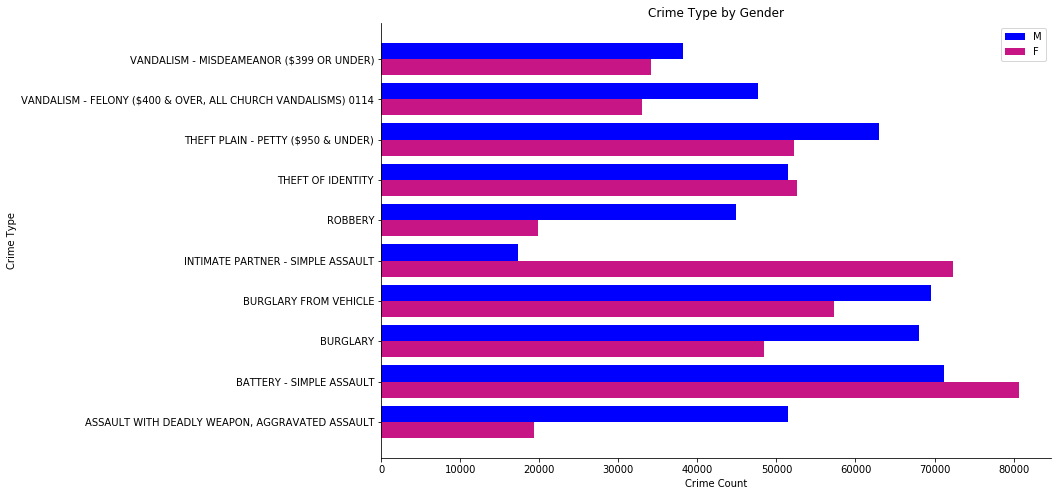

In [53]:
fig,ax=plt.subplots(figsize=(12,8))

# PLotting
bar_width=0.4
bar1=ax.barh(df22["Crime Code Description"], width=df22["Count"], height=bar_width*-1, align="edge", color="Mediumvioletred")
bar2=ax.barh(df23["Crime Code Description"], width=df23["Count"], height=bar_width, align="edge", color="Blue")
ax.set_title("Crime Type by Gender")
ax.set_xlabel("Crime Count")
ax.set_ylabel("Crime Type")
ax.set_yticklabels(labels=df22["Crime Code Description"])
ax.legend((bar2,bar1),("M","F"))

sns.despine()

Some things to note are:
* The close to equal distribution for vandalism (misdemeanor) and identity theft.
* The two crimes that women victims are more often are Intimate partner sexual assault & Battery simple assault.
* I would expect that burglary from vehicle or stolen vehicle would have equal distribution. It is just probably just that there are more cars owned by males than females.

## <font color=Blue>4.2. Gun Crimes and Hour Occurred</font>

In [54]:
# Subsetting Handguns and Semi-automatic pistols
df24=crime[(crime["Weapon Description"] == "HAND GUN") | 
                                                 (crime["Weapon Description"] == "SEMI-AUTOMATIC PISTOL")]

# Grouping by Hour and Weapon
df24=df24.groupby(["Hour Occurred", "Weapon Description"]).size().reset_index(name="Count")
df25=df24[df24["Weapon Description"]=="HAND GUN"]
df26=df24[df24["Weapon Description"]=="SEMI-AUTOMATIC PISTOL"]

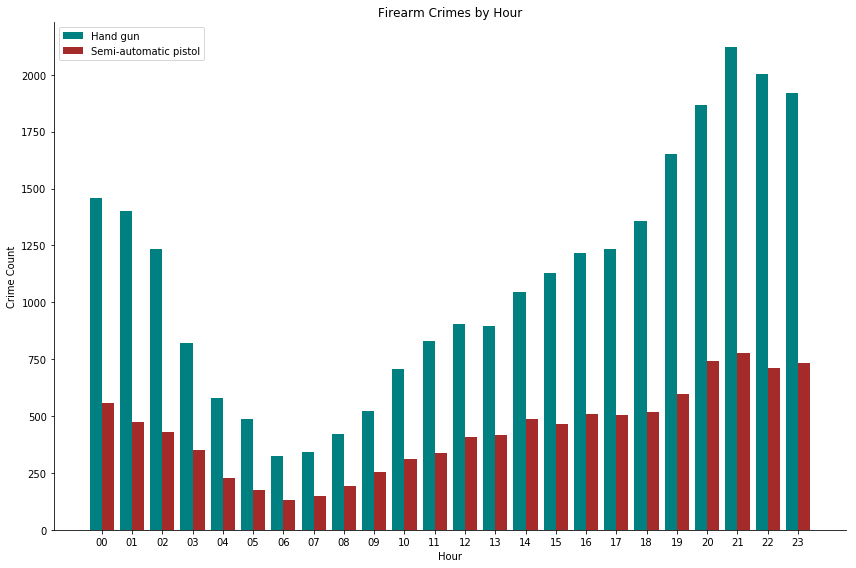

In [55]:
fig,ax=plt.subplots(figsize=(12,8))

# PLotting
bar_width=0.4
bar1=ax.bar(df25["Hour Occurred"], height=df25["Count"], width=bar_width*-1, align="edge", color="Teal")
bar2=ax.bar(df26["Hour Occurred"], height=df26["Count"], width=bar_width, align="edge", color="Brown")
ax.set_title("Firearm Crimes by Hour")
ax.set_xlabel("Hour")
ax.set_ylabel("Crime Count")
ax.legend((bar1,bar2),("Hand gun","Semi-automatic pistol"))

fig.tight_layout()
sns.despine()

As we can see, firearm activites occur at night, between 7pm to 2am with its peak at 9pm.

## <font color=Blue>4.3. Premise and Hour Occurred</font>

In [56]:
# Saving top 5 premises and subsetting
top5premises1=crime["Premise Description"].value_counts().head(5).index
df27=crime.loc[crime["Premise Description"].isin(top5premises1)]

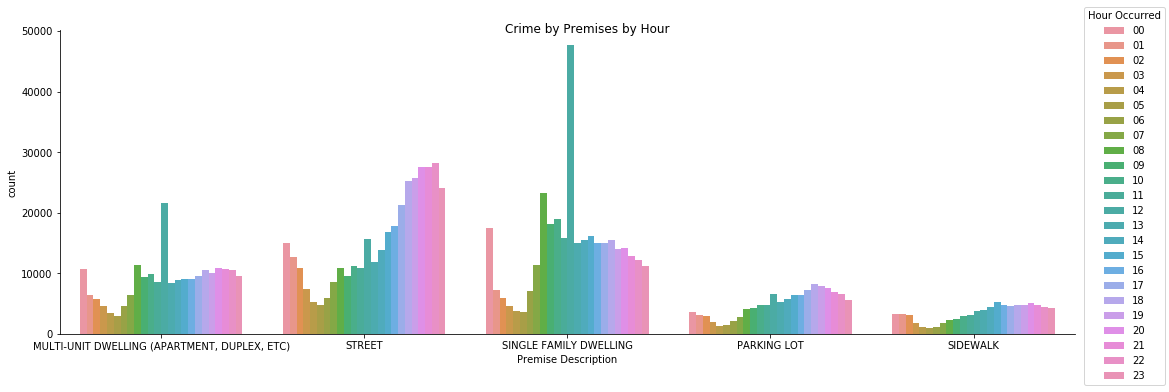

In [79]:
# Plotting
g=sns.factorplot(x="Premise Description", hue="Hour Occurred", kind="count", data=df27, size=5, aspect=3)
g.fig.suptitle("Crime by Premises by Hour")
ax.set(xlabel='Hours', ylabel='Count')

sns.despine()

* Streets are generally more unsafe at night, so are sidewalks.
* In dwellings, we see the 12pm surge of crimes again.

## <font color=Blue>4.4 Premise and Type of Crime</font>

In [84]:
# Saving top 10 types of crime and subsetting
top10crimes2=crime["Crime Code Description"].value_counts().head(16).index
df28=df27.loc[df27["Crime Code Description"].isin(top10crimes2)]

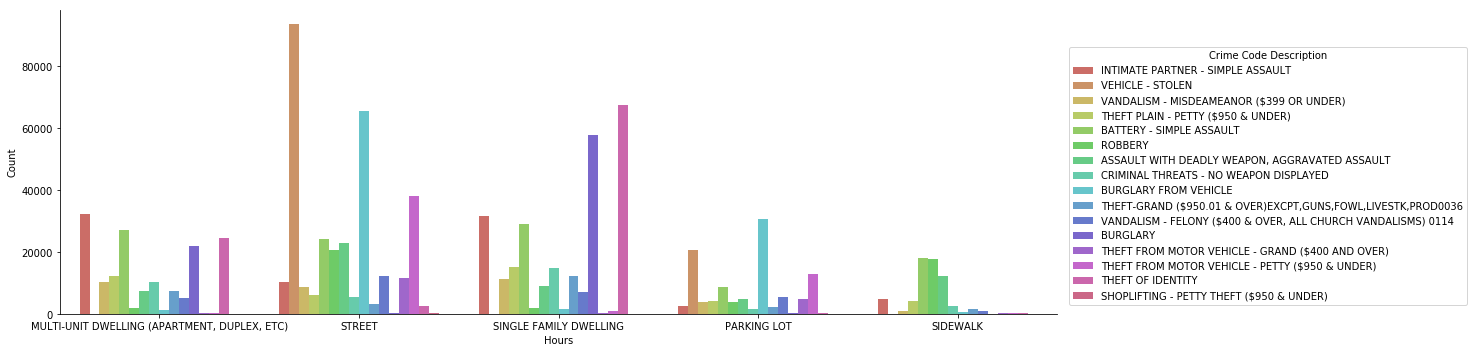

In [90]:
# Plotting
sns.set_palette("hls", n_colors=16)
ax = sns.factorplot(x="Premise Description", hue="Crime Code Description", kind="count", data=df28, size=5, aspect=3)
g.fig.suptitle("Crime by Premises by Hour")
ax.set_xlabels("Hours")
ax.set_ylabels("Count")

sns.despine()

* It is interesting to see that with the same amount of intimate partner sexual assault in mult-units and single family dwelling, the difference in identity theft and burglary is so significant.

* Another thing is that vehicles are stolen four times more often in the street compared to the parking lot.

## <font color=Blue>4.5. Juvenile Arrests</font>

<p>I plan to explore juvenile arrests to try and reduce it in the future. <br>There is no clear way to look at the infographics of the juvenile offender, so we shall look at who the victims are.</p>

In [91]:
# Filtering the dataset with juvenile arrests (by selection)
df29 = crime[crime["Status Description"]=="Juv Arrest"]

### 4.5.1. Who

Normalizing the distribution histogram, let us plot the ages of victims of juvenile crimes.

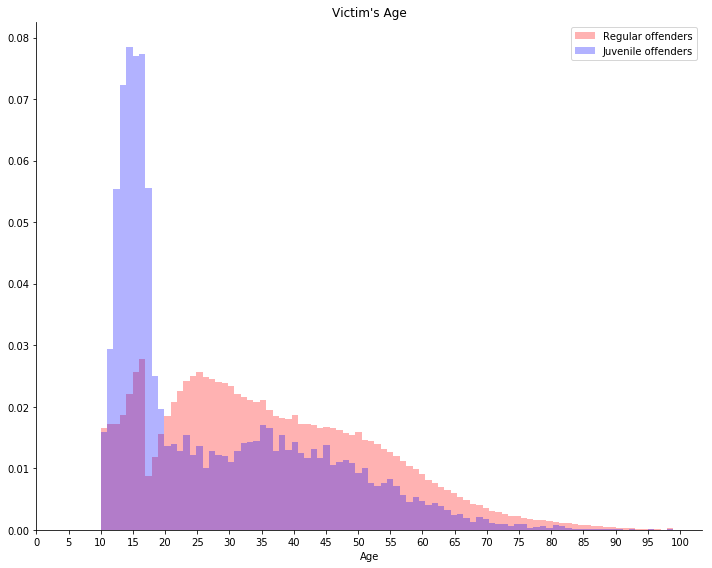

In [141]:
fig,ax=plt.subplots()

# Plotting
ax.hist(crime["Victim Age"].dropna(), bins=90, color="Red", alpha=.3, normed=True, label="Regular offenders")
ax.hist(df29["Victim Age"].dropna(), bins=90, color="Blue", alpha=.3, normed=True, label="Juvenile offenders")
ax.set_title("Victim's Age")
ax.set_xlabel("Age")
ax.set_xticks(np.arange(0,101,5))
ax.legend()

fig.tight_layout()
sns.despine()

### 4.5.2. What

In [148]:
# Top 10 crimes committed by Juveniles
df30=df29["Crime Code Description"].value_counts()[:10].to_frame()

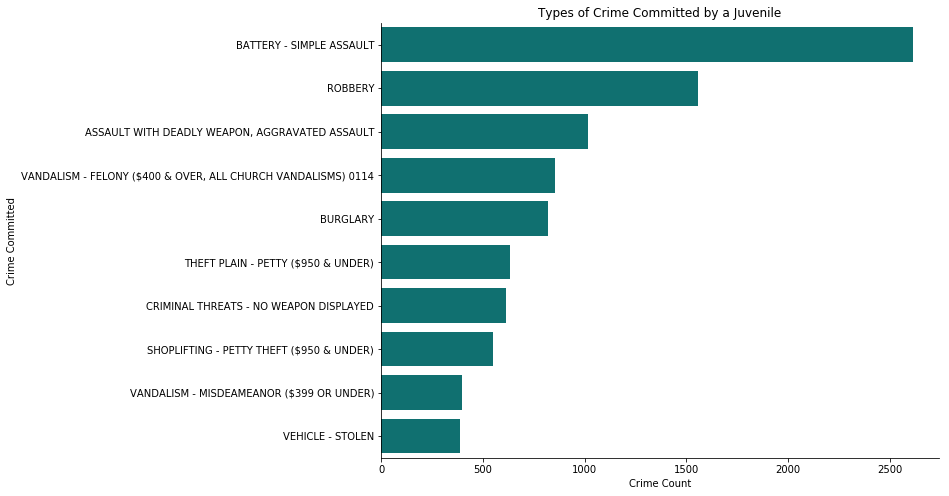

In [149]:
fig,ax=plt.subplots()

# Plotting
sns.barplot(y=df30.index, x=df30["Crime Code Description"], color="Teal", ax=ax)
ax.set_title("Types of Crime Committed by a Juvenile")
ax.set_xlabel("Crime Count")
ax.set_ylabel("Crime Committed")

sns.despine()

<p>Going in, I expected shoplifting and vandalism to be the top contenders but I was not really surprised that battery simple assault takes the lead. <br>We have to reduce the violent characteristics of kids at a young age. There are several suspected sources such as media, videogames, and family that can affect violence.</p>

### 4.5.3. Where

In [152]:
# Top 10 crimes committed by Juveniles
df31=df29["Premise Description"].value_counts()[:10].to_frame()

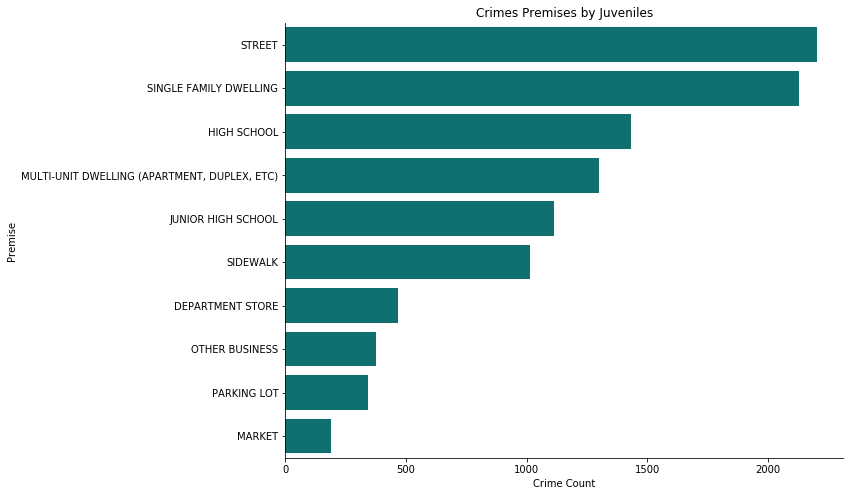

In [153]:
fig,ax=plt.subplots()

# Plotting
sns.barplot(y=df31.index, x=df31["Premise Description"], color="Teal", ax=ax)
ax.set_title("Crimes Premises by Juveniles")
ax.set_xlabel("Crime Count")
ax.set_ylabel("Premise")

sns.despine()

<p>It is hard to tell if there are more kids living single family dwellings than multi-unit dwellings <b>OR</b> kids in single family dwellings are more prone to committing a crime than the kids in multi-unit dwellings. <br>It is just as surprising that there are equal amounts of crimes committed on the street as in a single family dwelling.</p>

### 4.5.4. When

#### 4.5.4.1. By Day (Occured)

In [154]:
# Saving dataframe by Day of the week of Juvenile crimes
df32=df29["Day Occurred"].value_counts().sort_index().to_frame()

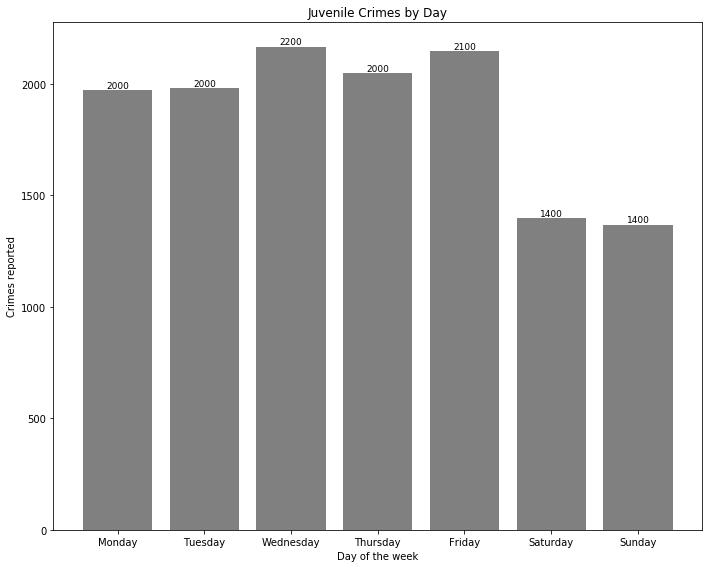

In [159]:
fig,ax=plt.subplots()

# Plotting
ax.bar(df32.index, df32["Day Occurred"], align="center", color="Gray")
ax.set_title("Juvenile Crimes by Day")
ax.set_xlabel("Day of the week")
ax.set_ylabel("Crimes occurred")
ax.set_xticklabels(["", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')

fig.tight_layout()

One reason crime might occur on weekdays is because they juveniles are not under parent supervision.

#### 4.5.4.2. By Hour

In [164]:
# Saving dataframe by hour occurred of Juvenile crimes
df33=df29["Hour Occurred"].value_counts().sort_index().to_frame()

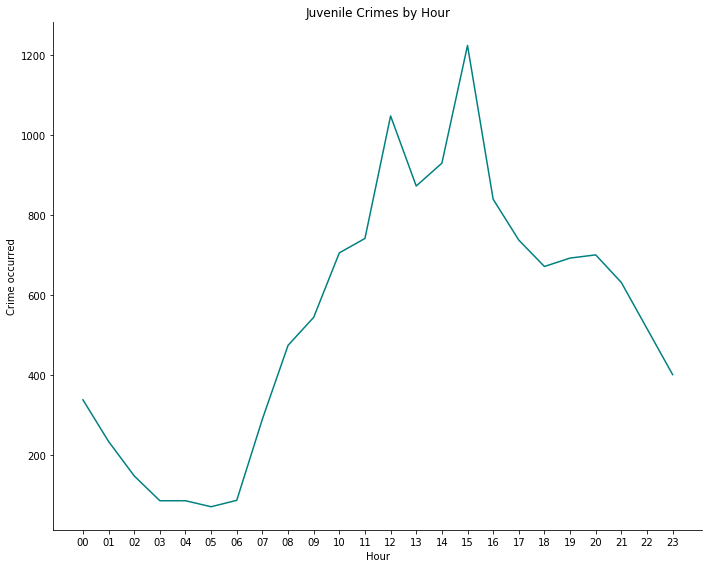

In [166]:
fig,ax=plt.subplots()

# Plotting
ax.plot(df33, color="Teal")
ax.set_title("Juvenile Crimes by Hour")
ax.set_xlabel("Hour")
ax.set_ylabel("Crime Occurred")

fig.tight_layout()
sns.despine()

As we can, crimes occur throughout school lunch hours between 12pm to 3pm, with a spike at 3pm which is around when school ends.

## <font color=Blue>4.6. Difference of most dangerous and safest neighborhood by hour</font>

In [168]:
# Filtering the safest and most dangerous areas and grouping by hour
df34=crime[(crime["Area Name"]=="77th Street") | (crime["Area Name"]=="Hollenbeck")]
df34=df34.groupby(["Area Name", "Hour Occurred"]).size().reset_index(name="Count")

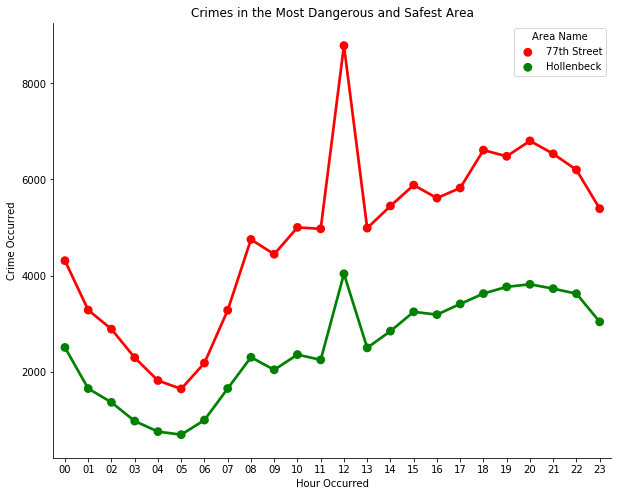

In [184]:
fig,ax=plt.subplots()

# Plotting
sns.pointplot(x="Hour Occurred", y="Count", hue="Area Name", data=df34, ax=ax, palette=["Red","Green"])
ax.set_title("Crimes in the Most Dangerous and Safest Area")
ax.set_ylabel("Crime Occurred")
sns.despine()

<p>Hollenbeck has 13150 population per square mile, and 77th Street has 14700 population per square mile.

Even though Hollenbeck is <u>more population dense</u> in 77th Street, it does not justify the nearly double crimes occurring in that area.

<br>Of course, I could be missing the point if these crimes were committed by someone not residing in the neighborhood.</p>

## <font color=Blue>4.7. Identity Theft Victims</font>

In [187]:
# Filter data with only Identity Theft crimes
df35=crime[crime["Crime Code Description"] == "THEFT OF IDENTITY"]

In [188]:
# Create subset with victim gender and age, then drop Na Values
df35=df35[["Victim Gender", "Victim Age"]]
df35=df35.dropna()

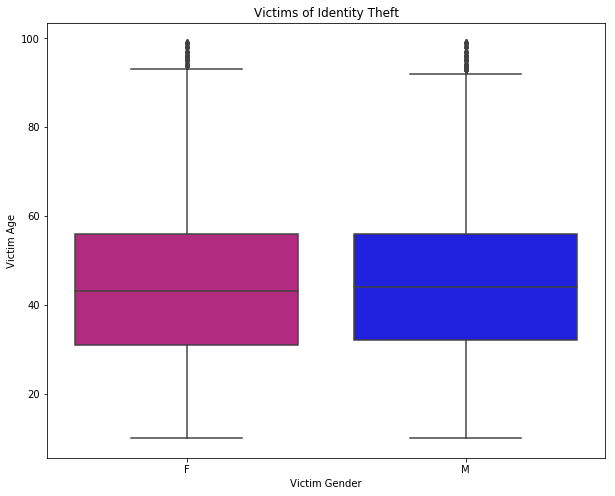

In [193]:
# Plotting
g=sns.boxplot(y="Victim Age", x="Victim Gender", data=df35, palette={"M": "b", "F": "mediumvioletred"})
plt.title("Victims of Identity Theft")

fig.tight_layout()

I expected there are a very similar distribution for identity theft because it is a rather random crime and here the age distribution is almost identical!

# 5. THE END

Thank you for taking the time to read through this. I am very grateful for any critics or tips to improve as this is my first ever project. I hope you gain some valuable insights and share this with someone who might find it interesting. If you have any questions, you can email me at **kennethnyu@hotmail.com** or comment on my **[GitHub page](https://github.com/kennethnyu/Crime-Data-Los-Angeles)** and go to Issues > New Issue. 

# 6. Things to Add

* Explore crimes under the weapon "Verbal Threat".
* Look at crimes that are solved, and the ones that are under investigations.
* Learn Machine Learning to predict: Type of crime or Premise.